# 1. Dataset Exploration and Visualization

## Imports:

In [6]:
import wfdb
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Load and Inspect Record


In [7]:
data_path = '../data/mit-bih-arrhythmia-database-1.0.0'
record_name = '100'
record = wfdb.rdrecord(os.path.join(data_path, record_name))

## Extract metadata


In [8]:
fs = record.fs
channels = record.sig_name
duration = record.sig_len / fs

print(f"Sampling frequency: {fs} Hz")
print(f"Channel names: {channels}")
print(f"Recording duration: {duration:.2f} seconds")

Sampling frequency: 360 Hz
Channel names: ['MLII', 'V5']
Recording duration: 1805.56 seconds


### Plot a 10-second segment from MLII channel


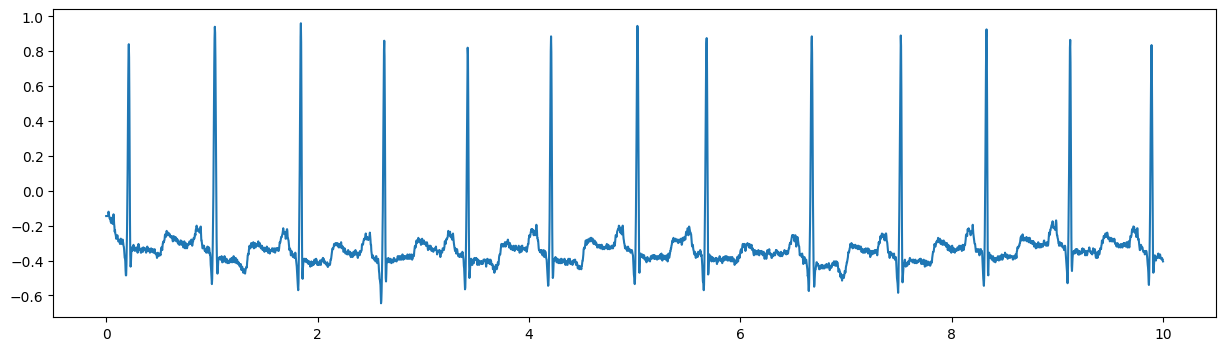

In [9]:
channel = 'MLII'
ch_idx = channels.index(channel)
start_sec = 0
duration_sec = 10
start_idx = int(start_sec * fs)
end_idx = int((start_sec + duration_sec) * fs)

signal = record.p_signal[start_idx:end_idx, ch_idx]
time = np.arange(start_idx, end_idx) / fs

plt.figure(figsize=(15, 4))
plt.plot(time, signal, label='MLII')

## Load annotations


In [10]:
annotation = wfdb.rdann(os.path.join(data_path, record_name), 'atr')
ann_indices = np.where((annotation.sample >= start_idx) & (annotation.sample < end_idx))[0]
ann_samples = annotation.sample[ann_indices]
ann_symbols = np.array(annotation.symbol)[ann_indices]

## Overlay annotations

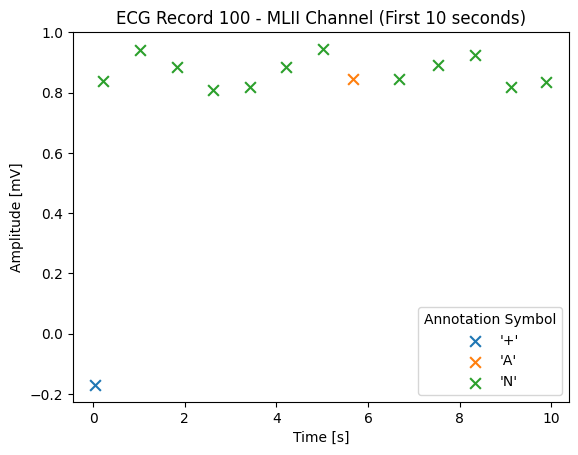

Heartbeat type distribution in segment:
  +: 1
  N: 12
  A: 1


In [17]:
for symbol in np.unique(ann_symbols):
    idxs = ann_samples[ann_symbols == symbol]
    plt.scatter(idxs / fs, signal[idxs - start_idx], label=f"'{symbol}'", s=60, marker='x')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')
plt.title(f'ECG Record {record_name} - {channel} Channel (First 10 seconds)')
plt.legend(title='Annotation Symbol')
plt.show()
# Summarize heartbeat type distribution
symbol_counts = Counter(ann_symbols)
print("Heartbeat type distribution in segment:")
for symbol, count in symbol_counts.items():
    print(f"  {symbol}: {count}")